# When having missing values their are two ways to handle them:
## 1. REMOVE THE ENTIRE ROW or REMOVE THEM (not preffered)
## 2. TO IMPUTE THEM

# Thier are two ways TO IMPUTE THEM:
## -Univarient While filling concentrate on one column at a time
## -Multivarient 

## Under Univarient we have techniques that depending on the type of cloumn i.e, numerical or categorical 
## If NUMERIC: 
### 1. Fill with mean or median
### 2. Fill with Random Value
### 3. Fill with End of Distribution Value 
## If CATEGORICAL:
### 1. Replace with mode
### 2. Write "Missing"

#### We have SimpleImputer class in Scikit Learn which we will be using for UNIVARIENT :)

## As for Multivarient Imputation We have two methods:
### 1. Using KNN Imputer
### 2. Iterative Imputer (It works on an algorithm called MICE)

# Let's learn about first method to handle missing values- Removing Data
## *It is called CCA (Complete case analysis). When we remove missing data it is called CCA. 

## *Complete case analysis is a statistical technique used to deal with missing data in a dataset. When analyzing a dataset, it is common to find missing values in some of the variables. 
## *Complete case analysis, also known as listwise deletion, involves removing any observations with missing values in any of the variables of interest.
## *The basic idea behind complete case analysis is that if the missing values are random, then deleting the observations with missing data will not significantly bias the results. However, if the missing data are not random, then complete case analysis can lead to biased results.
## * if a case has missing data on any of the variables of interest, it is deleted or removed from the analysis. This leads to a "complete" set of cases with no missing values on any of the variables. Hence the name "complete case analysis.

### ASSUMPTIONS FOR CCA:-
### 1. Missing data are missing completely at random (MCAR): the probability of a data point being missing is unrelated to the value of that data point or any other variables in the dataset. If the missing data are not MCAR, then the results of CCA may be biased.
### 2. The remaining data are representative of the population: This means that the missing data are not concentrated in a particular group or subgroup of cases that may differ systematically from the remaining cases.
### 3. There are no systematic differences between missing and non-missing data
### 4. The missing data are ignorable

### ADVANTAGES Of CCA:
### -Simplicity
### -No Imputation Required 
### -Preserves statistical power: CCA does not require any assumptions about the missing data mechanism, and it is unbiased if the data are missing completely at random. 



### DISADVANTAGES Of CCA:
### -Reduction in sample size
### -Loss of information
### -Biased results
### -Unequal impact of missing data
### -Model have no knowledge on how to handle missing data

## WHEN to use CCA?
### 1. MCAR
### 2. If 5% or less data is missing

# IMPLEMENTATION

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("OneDrive/Desktop/SAMIYA/Samiya_learn/Datasets/aug_train.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.isnull().mean()*100 #to calculate the percentage of missing values in each column of a pandas DataFrame.

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.shape

(19158, 14)

In [7]:
# Can't implement CCA on gender, major_discipline,company_size and company_type as >5% missing
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [8]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
13502,no_enrollment,Primary School,4,1
1809,no_enrollment,Graduate,11,1
10784,no_enrollment,Graduate,11,1
3169,no_enrollment,Graduate,5,never
7347,Full time course,High School,3,1


In [9]:
len(df[cols].dropna()) / len(df)

0.9402860423843825

In [10]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 14), (18014, 4))

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   enrolled_university  18014 non-null  object
 1   education_level      18014 non-null  object
 2   experience           18014 non-null  object
 3   last_new_job         18014 non-null  object
dtypes: object(4)
memory usage: 703.7+ KB


In [12]:
new_df.sample(5)

,enrolled_university,education_level,experience,last_new_job
8049,no_enrollment,Graduate,5,1
1560,no_enrollment,Masters,9,>4
9981,Full time course,Masters,15,never
16226,no_enrollment,Graduate,9,1
13597,no_enrollment,Phd,9,>4


<Axes: >

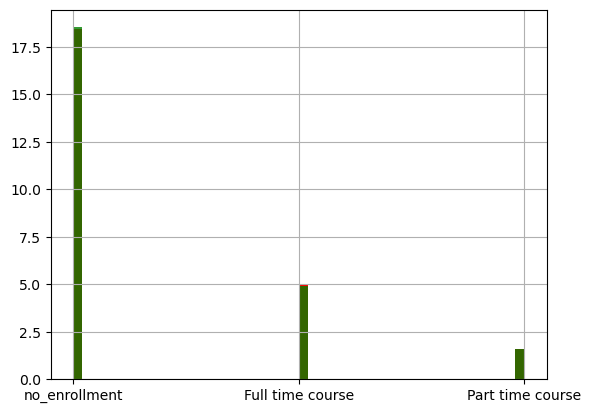

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['enrolled_university'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['enrolled_university'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

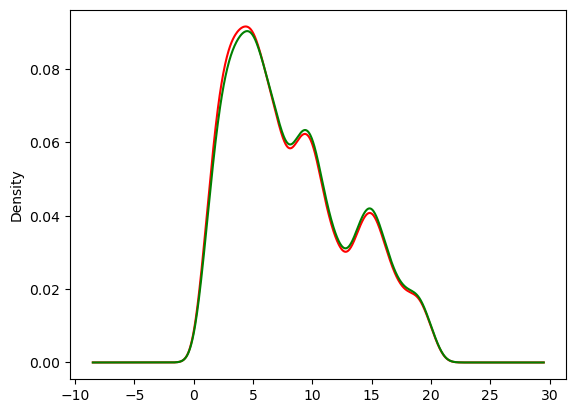

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# convert experience column in df to numeric
df['experience'] = pd.to_numeric(df['experience'])
new_df['experience'] = pd.to_numeric(new_df['experience'])

# create a new figure and axis
fig, ax = plt.subplots()

# plot density for original data
df['experience'].plot.density(color='red', ax=ax)

# plot density for data after cca
new_df['experience'].plot.density(color='green', ax=ax)

# show the plot
plt.show()


In [28]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.740979
Full time course,0.196106,0.195237
Part time course,0.062533,0.063784


In [29]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.621072
Masters,0.227633,0.234706
High School,0.105282,0.105918
Phd,0.021610,0.022149
Primary School,0.016077,0.016154


# Second method to handle missing values- to fill/impute missing values

## Two ways:
## 1. Univarient Imputation
## 2. Multivarient Imputation

# Mean/Median Imputation
## Mean-median imputation is a simple imputation technique used for handling missing data in a dataset. This technique involves replacing missing values with either the mean or median value of the non-missing values in the same variable.

# Use Mean or Median?
## - If normally distributed then use mean
## - If skwed distribution use median

# Benefits
## -Simplicity
## -Reusable

# Disadvantages
## -Changes Distribution
## - Can work only when 5% or less missing data
## -Outliers
## -Covariance and Corelation can changes 

# When to use?
## -when data missing at completely missing at random
## -less that 5% data missing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df=pd.read_csv("OneDrive/Desktop/SAMIYA/Samiya_learn/Datasets/titanic_toy.csv")

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [10]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [11]:
X_train.isnull().mean()


Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [12]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [14]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [15]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
151,22.0,66.600,1,22.0,22.0,66.600,66.600
767,30.5,7.750,0,30.5,30.5,7.750,7.750
297,2.0,151.550,3,2.0,2.0,151.550,151.550
642,2.0,27.900,5,2.0,2.0,27.900,27.900
700,18.0,227.525,1,18.0,18.0,227.525,227.525


In [17]:
#import to check the new variance
# their should not be drastic change
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


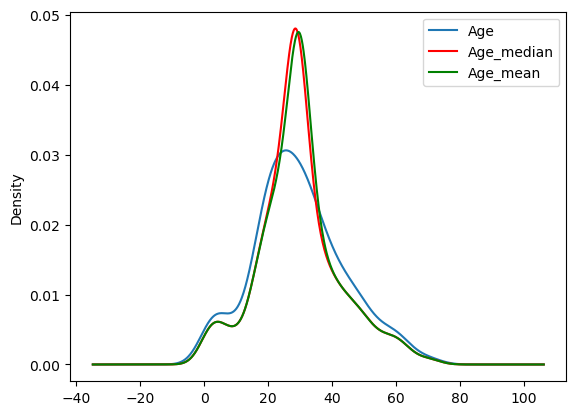

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #Its a red flag cause of drastic change

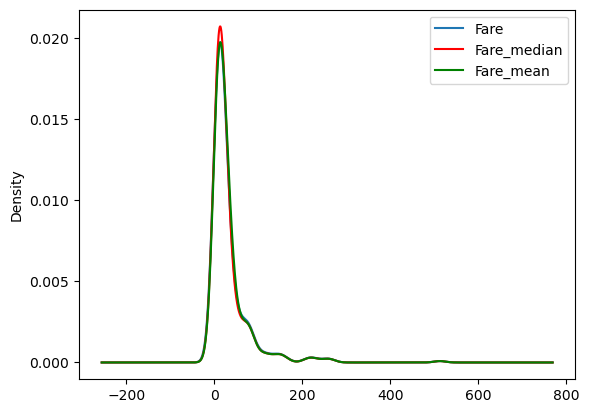

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')  #this is fine

In [24]:
X_train.cov() 
#correlation less change cause from -1 to 1 but for covariance big change

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [25]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

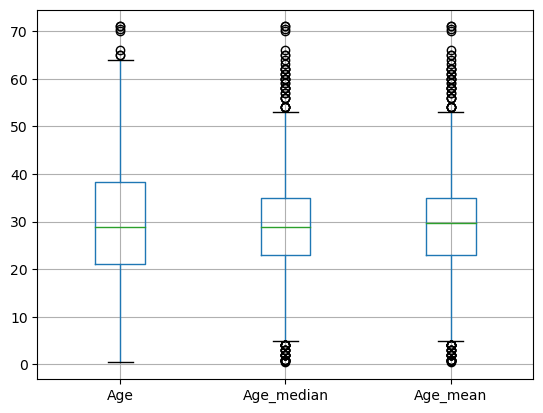

In [26]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot() #can see that it have resulted in outliers 
# recommended to see boxplot documentation :"https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html"

<Axes: >

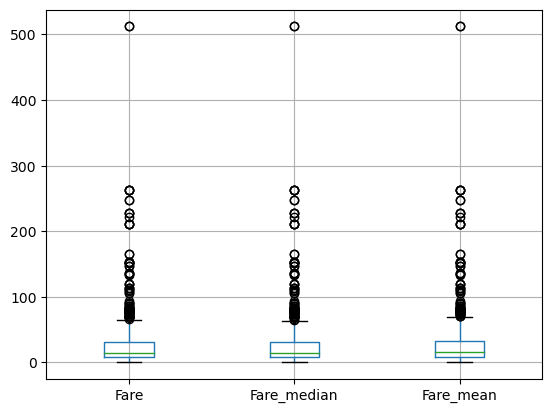

In [27]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot() #better resultss!!

# Let's USe Sklearn : SimpleImputer :)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# documentation for SimpleImputer :"https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html"

In [34]:
imputer1 = SimpleImputer(strategy='median')  #median implementation
imputer2 = SimpleImputer(strategy='mean')    #mean implementation

In [36]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])   
],remainder='passthrough') 

'''trf object is a pipeline that preprocesses the 'Age' and 'Fare' columns of a dataset using imputation, 
while leaving all other columns unchanged. We have two transformers  'imputer1' and 'imputer2' 
that impute missing values in the 'Age' and 'Fare' columns, respectively.'''

"trf object is a pipeline that preprocesses the 'Age' and 'Fare' columns of a dataset using imputation, \nwhile leaving all other columns unchanged. We have two transformers  'imputer1' and 'imputer2' \nthat impute missing values in the 'Age' and 'Fare' columns, respectively."

In [37]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [38]:
trf.named_transformers_['imputer1'].statistics_  #nothing but median value of age

array([28.75])

In [40]:
trf.named_transformers_['imputer2'].statistics_  #mean value of fare

array([32.61759689])

In [41]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [42]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

# Arbitrary Value Imputation 
## Arbitrary value imputation is a technique for handling missing data in a dataset by replacing the missing values with a chosen arbitrary value. This value can be any fixed value, such as 0 or -1, or a value chosen based on domain knowledge or experience.  Mostly used for categorical data but can use in numeric too. It is simple and easy to implement but Variance and Co variance changes. This technique is used to create some difference btw known and unknown values

## When to use it
## Data missing at random but we have more better methods too :)

In [43]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [44]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [45]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [47]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())


Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  47219.20265217623
Fare Variance after -1 wala imputation:  2378.5676784883503


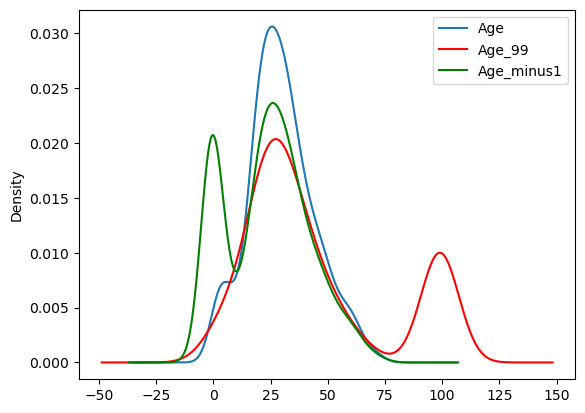

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

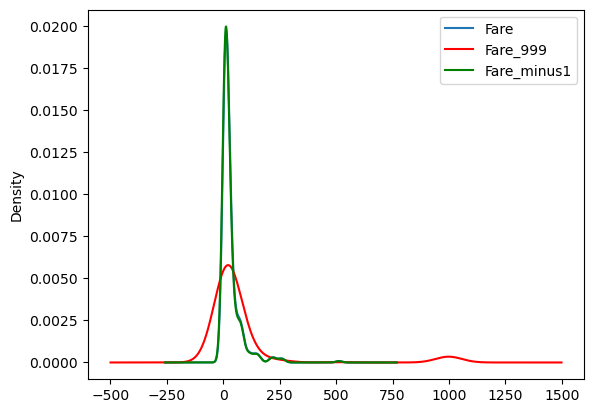

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [50]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [51]:
X_train.corr()


,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


# Using Sklearn

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [54]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')


In [55]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [56]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [57]:
trf.named_transformers_['imputer2'].statistics_


array([999.])

In [58]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [59]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

# End of Distribution Value Imputation

## It is simply an extension of Arbitrary imputation
## The rationale behind end of distribution imputation is that the missing values are likely to be outliers or extreme values, and therefore replacing them with a value at the tail end of the distribution may better reflect the true value of the missing data. This technique can also help to preserve the variability of the data and avoid underestimating the standard errors of the estimates
## If normally distributed use [mean+3(sigma)] or [mean-3(sigma)]
## If Skwed use IQR Proximity Rule [Q1-1.5(IQR)] or [Q3 +1.5(IQR)] where IQR =Q3-Q1

# Handling Categorical Missing Data

## We can handle it in two ways:
## 1. Most frequent value replacement
## 2. Create new category by the name of missing
### We have other methods too. Will try to implement them too

# * MOST FREQUENT VALUE IMPLEMENTATION

## If less than 5%data is MCAR we replace it with mode. We can use the same approach in numerical data too but mean and median performs better.

## ASSUMPTIONS:
## 1. MCAR
## 2. mode value should be a lot more than other values

## This technique is really simple but can change distribution of data

# * MISSING CATEGORY IMPUTATION

## Consider a case where more data is missing. Create a category of missing. So, now we have one more category than the original. We are trying to show algorithm that this data is missing. We use "missing" word. Use it when data is not randomly missing. This too is very easy. This approach can create a randomness in you data

# Implementing Most Frequent value imputation method

In [6]:
df=pd.read_csv("OneDrive/Desktop/SAMIYA/Samiya_learn/Datasets/train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [7]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [8]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

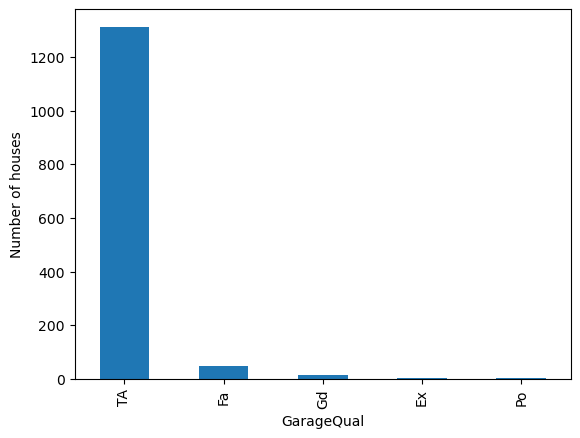

In [9]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [10]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

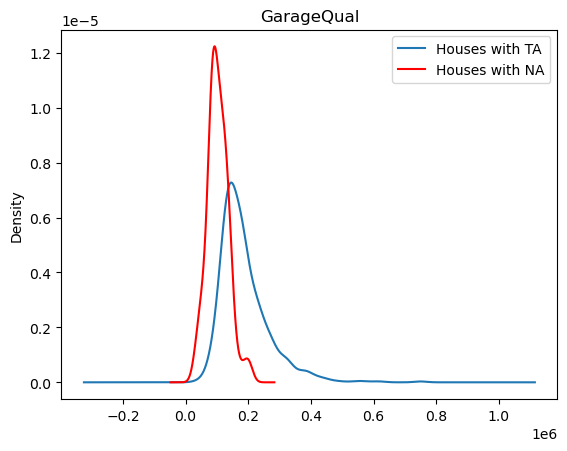

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [13]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [15]:
df['GarageQual'].fillna('TA', inplace=True)
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


<Axes: >

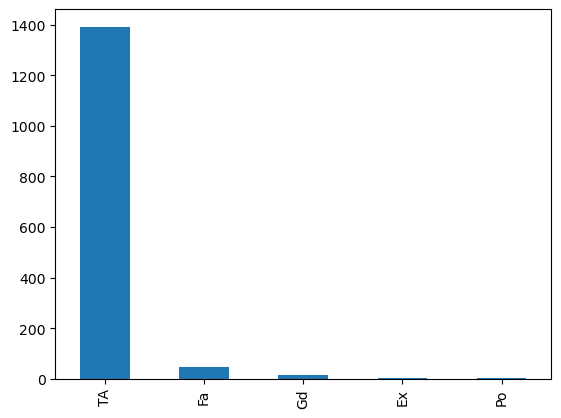

In [16]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

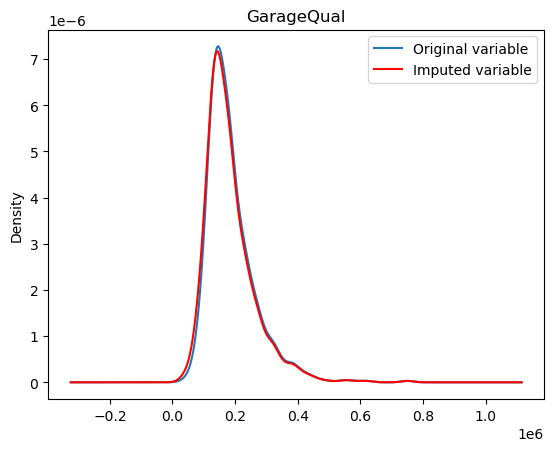

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde', ax=ax)
# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: >

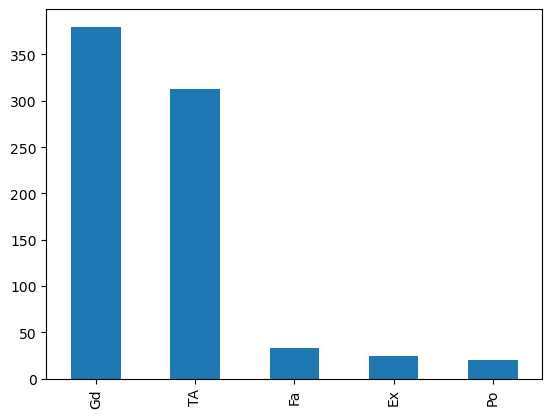

In [22]:
df['FireplaceQu'].value_counts().plot(kind='bar') #notice two categories almost same

In [23]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

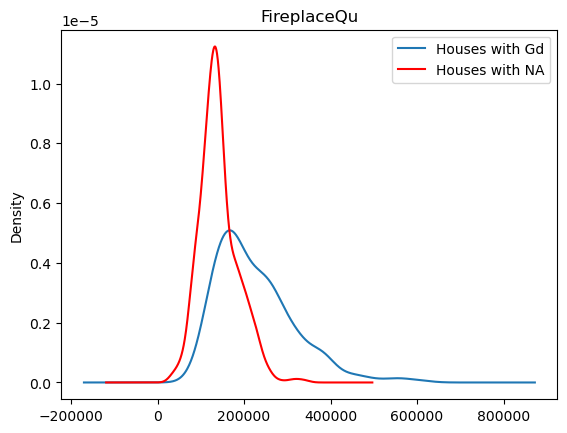

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

<Axes: >

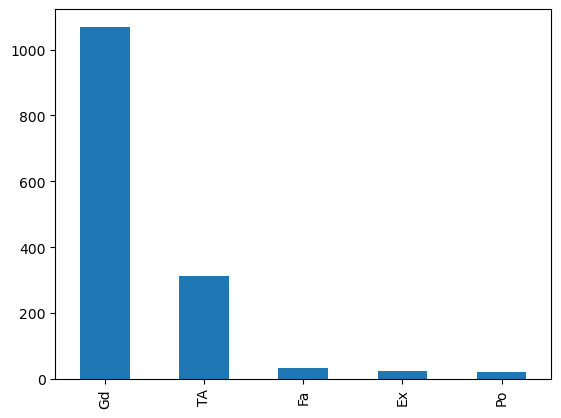

In [26]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd', inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

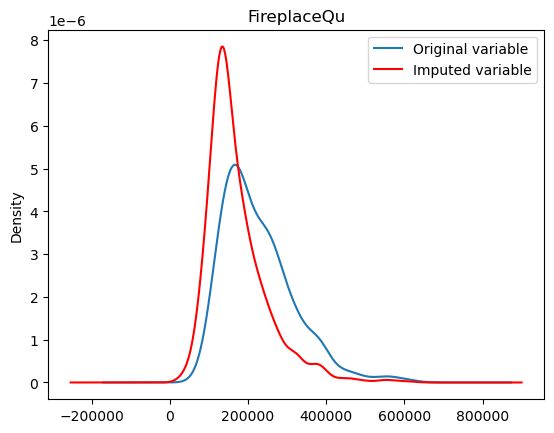

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

# Using Sklearn

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [32]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [33]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# Missing Category Imputation

In [34]:
df=pd.read_csv("OneDrive/Desktop/SAMIYA/Samiya_learn/Datasets/train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [35]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [36]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

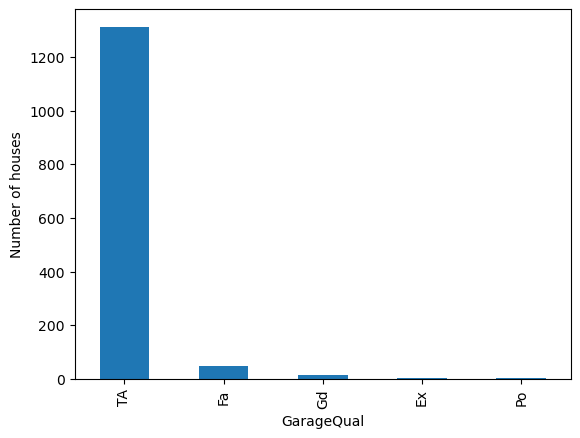

In [37]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [38]:
df['GarageQual'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

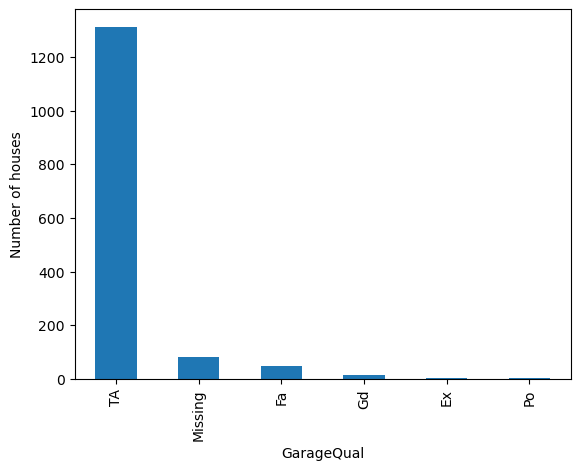

In [39]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

# Using SKlearn

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [49]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [50]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

# Discussing few other techniques

## 1. Random values Imputation
## 2. Missing Indicator
## 3. Autmatic selection of parameters

# * Randome Imputation

## replace missing values in a dataset with randomly generated values. This technique is often used when the missing values are thought to be missing at random (MAR), meaning that the missingness is unrelated to the values of other variables in the dataset. To prevent the imputed values from having a bias towards any particular value. The random values are generated using a probability distribution that is estimated from the observed values in the dataset. Can be applied to both categorical and numeric data. No issue with variance and distribution. Do not use in Decision Trees. We will implement  this using pandas. We can't use sklearn for it. Covariance can change or disturbed. Memory heavy for deployment. Favourable for linear models cause distribution is not effected. 

In [34]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv("OneDrive/Desktop/SAMIYA/Samiya_learn/Datasets/titanic_toy.csv",usecols=['Age','Fare','Survived'])

In [36]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [38]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [39]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [42]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [43]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,NaN,29.0


In [44]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [45]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] # All data with NAN

Series([], Name: Age_imputed, dtype: float64)

In [46]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([19.  , 21.  , 22.  , 59.  , 28.  , 18.  , 24.  , 50.  , 32.  ,
        1.  , 30.  , 21.  , 51.  , 66.  , 24.  , 15.  , 21.  , 35.  ,
       16.  , 38.  , 70.  , 29.  , 16.  , 38.  ,  2.  , 17.  , 29.  ,
       17.  , 32.  ,  4.  , 41.  , 17.  , 49.  ,  9.  , 35.  , 31.  ,
       35.  , 44.  , 19.  , 52.  , 22.  , 23.  , 22.  , 47.  , 10.  ,
       24.  , 35.  , 58.  , 42.  , 40.  ,  8.  , 16.  , 27.  , 25.  ,
        4.  , 49.  , 25.  , 33.  , 28.  , 54.  , 32.  , 42.  , 22.  ,
       63.  , 26.  , 27.  ,  1.  , 25.  ,  9.  , 17.  , 45.  , 36.  ,
       45.5 , 27.  , 24.  , 28.  , 42.  , 31.  , 42.  , 23.  , 24.  ,
       28.  , 34.  , 25.  , 47.  , 60.  ,  4.  , 24.  , 17.  , 34.  ,
       41.  , 58.  , 25.  , 30.  , 40.  , 28.  ,  9.  , 20.  , 24.  ,
       31.  , 32.  , 31.  , 30.  , 45.  , 30.  , 32.  , 27.  , 31.  ,
       18.  , 33.  , 34.  , 18.  , 45.5 , 21.  ,  0.83, 26.  , 16.  ,
       45.  , 19.  , 24.  , 27.  , 24.  , 13.  , 25.  , 29.  , 40.  ,
       33.  ,  9.  ,

In [47]:
X_train['Age'].isnull().sum()

148

In [48]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,39.0
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

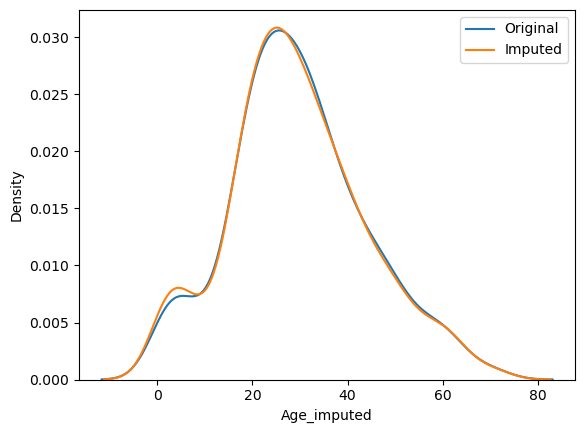

In [49]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [50]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  208.07190343715945


In [51]:
X_train[['Fare', 'Age', 'Age_imputed']].cov() #covariance changed

,Fare,Age,Age_imputed
Fare,2448.197914,70.719262,53.296848
Age,70.719262,204.349513,204.349513
Age_imputed,53.296848,204.349513,208.071903


<Axes: >

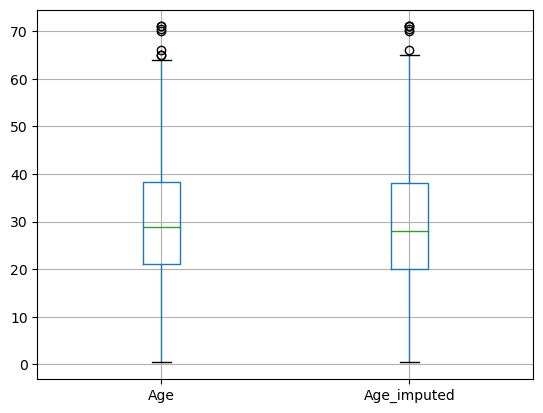

In [52]:
X_train[['Age', 'Age_imputed']].boxplot() #no special effect of autliers

In [ ]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))
''' one problem here is that no. are generated at random so every time we run we get different no. So we have to generate same
number i.e, make usre they do not change. To do that in random_state in current observation write it's fare value'''

# Implementation on Categorical data

In [56]:
data = pd.read_csv('OneDrive/Desktop/SAMIYA/Samiya_learn/Datasets/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [57]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [58]:
X = data
y = data['SalePrice']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [61]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1169,TA,TA,625000,TA,TA
490,Gd,TA,115000,TA,Gd
1298,Gd,TA,160000,TA,Gd
884,NaN,TA,100000,TA,NaN
973,NaN,TA,182000,TA,NaN


In [62]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\

In [63]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [64]:
temp # not much change

,original,imputed
TA,0.951043,0.949486
Fa,0.037171,0.037671
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [65]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp #change

,original,imputed
Gd,0.494272,0.644220
TA,0.412439,0.545455
Fa,0.040917,0.052750
Po,0.027823,0.034792
Ex,0.024550,0.033670


C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github

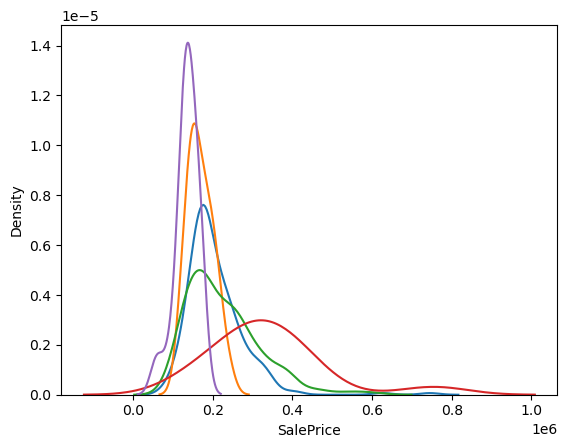

In [66]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.

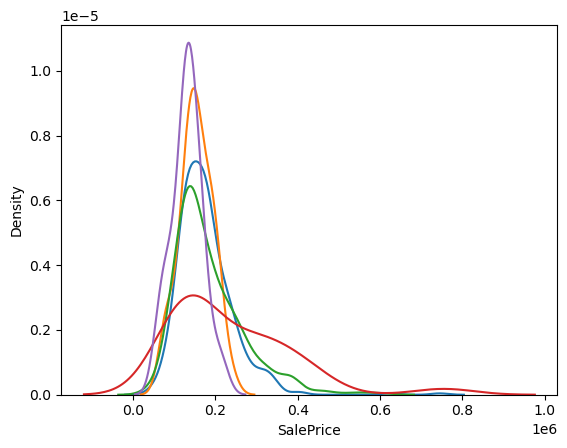

In [67]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

# Missing Indicator

## In this we make new column for every column with missing data holding only two values True and False.

In [137]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator,SimpleImputer

In [138]:
df = pd.read_csv('OneDrive/Desktop/SAMIYA/Samiya_learn/Datasets/titanic_toy.csv',usecols=['Age','Fare','Survived'])


In [139]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [140]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [142]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [143]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [144]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [145]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6033519553072626

In [146]:
mi = MissingIndicator()

mi.fit(X_train)

MissingIndicator()

In [147]:
mi.features_

array([0, 1], dtype=int64)

In [148]:
X_train_missing = mi.transform(X_train)

In [149]:
X_train_missing

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [ True, False],
       [ True, False]])

In [150]:
X_train_missing = np.any(X_train_missing, axis=1)
X_train_missing = X_train_missing.reshape(-1, 1)
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [153]:
X_test_missing = mi.transform(X_test)
X_test_missing

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [ True, False],
       [False, False],
       [ True, False],
       [False, False],
       [False,  True],
       [False, False],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [Fal

In [154]:
X_test_missing = np.any(X_test_missing, axis=1)
X_test_missing = X_test_missing.reshape(-1, 1)
X_test_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [155]:
X_train['Age_NA'] = X_train_missing

In [156]:
X_test

,Age,Fare
707,42.0,26.2875
37,21.0,8.0500
615,24.0,65.0000
169,28.0,56.4958
68,17.0,7.9250
...,...,...
89,24.0,8.0500
80,22.0,9.0000
846,NaN,69.5500
870,26.0,7.8958


In [157]:
X_test['Age_NA'] = X_test_missing

In [158]:
X_train

,Age,Fare,Age_NA
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False
...,...,...,...
534,30.0,8.6625,False
584,NaN,8.7125,True
493,71.0,49.5042,False
527,NaN,221.7792,True


In [159]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [162]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)  #accuracy improved with missing imputor than the other

0.6089385474860335

In [163]:
si = SimpleImputer(add_indicator=True)
X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)

In [161]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)  #same as above

0.6089385474860335

# Automatically select value for Imputation

## We use a technique called grid search cv. Automatically sklearn search for best values from the combinations.


In [164]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [165]:
df = pd.read_csv('OneDrive/Desktop/SAMIYA/Samiya_learn/Datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [167]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [168]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [172]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [173]:
categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [174]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [175]:

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [176]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [177]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [178]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [179]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [180]:
import pandas as pd
# all combinations
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10,most_frequent,mean,0.787852
9,10,most_frequent,median,0.787852
10,10,constant,mean,0.787852
11,10,constant,median,0.787852
12,100,most_frequent,mean,0.787852
13,100,most_frequent,median,0.787852


# MULTIVARIANTE
## * KNN Imputer 
## * Iteravtive Imputer

# KNN IMPUTER 

## It works on KNN algorithm. If value missing then replace it with most similar value. Similarity can be found using Euclidean distance. This technique is more accurate but requires quite a lot of calculation. Speed of computation is slow.

In [181]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
df = pd.read_csv('OneDrive/Desktop/SAMIYA/Samiya_learn/Datasets/titanic.csv')[['Age','Pclass','Fare','Survived']]
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [182]:
df.isnull().mean() * 100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [183]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [184]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [185]:
X_train.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


In [186]:
knn = KNNImputer(n_neighbors=3,weights='distance')  #You can change parameter as you see fit
# weights default is uniform 

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [187]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [188]:
# Comparision with Simple Imputer mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [189]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

# ITERATIVE IMPUTOR- MICE (Multivariate Imputation by Chained Equations)

## Basically data can be MCAR, MAR (missing data was not added intentionally but can be added by considering other i.e relation exists with other data), and MNAR (intentionally data missing i.e, no relation). Use MICE when MAR. It is accurate nut slow and issue with memory.

In [190]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [191]:
df = np.round(pd.read_csv('OneDrive/Desktop/SAMIYA/Samiya_learn/Datasets/50_Startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
np.random.seed(9)
df = df.sample(5)
df

,R&D Spend,Administration,Marketing Spend,Profit
21,8.0,15.0,30.0,11.0
37,4.0,5.0,20.0,9.0
2,15.0,10.0,41.0,19.0
14,12.0,16.0,26.0,13.0
44,2.0,15.0,3.0,7.0


## STEPS:
## 1. Consider actual data
## 2. remove target column as MICE is implemented only on input columns
## 3. Introduce some fake NaN i.e, delete some data intentionally any
## 4. Fill NaN with mean of their respective column
## 5. Move from left to write in data and one by one again change new mean values to NaN.
## 6. Use any algorithm. The row in which data is where we will do prediction rest all data will become training data. We also have output data. Then predict missing value using available data. The predicted missing value will be used in xt steps where we predict other missing values of other columns while moving from left to right.
## 7. Now, we have different data according to their iterations. Subtract consecutive iteravtions. Example I0-I1= Difference, I1-I2= Difference... follow to cover all iterations. You can have many iterations. Your goal is to have value of difference close to zero i.e, it will be close to the actual value.

In [192]:
df = df.iloc[:,0:-1]
df

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,4.0,5.0,20.0
2,15.0,10.0,41.0
14,12.0,16.0,26.0
44,2.0,15.0,3.0


In [193]:
#make random value NaN
df.iloc[1,0] = np.NaN
df.iloc[3,1] = np.NaN
df.iloc[-1,-1] = np.NaN

C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\2040708130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[1,0] = np.NaN
C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\2040708130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[3,1] = np.NaN
C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_1724\2040708130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[-1,

In [194]:
df.head() 

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,NaN,5.0,20.0
2,15.0,10.0,41.0
14,12.0,NaN,26.0
44,2.0,15.0,NaN


In [197]:
#Impute all missing values with mean of respective col

df0 = pd.DataFrame()

df0['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

In [196]:
# Remove the col1 imputed value
df1 = df0.copy()

df1.iloc[1,0] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.25,26.00
44,2.0,15.00,29.25


In [198]:
# Use first 3 rows to build a model and use the last for prediction

X = df1.iloc[[0,2,3,4],1:3]
X

,Administration,Marketing Spend
21,15.00,30.00
2,10.00,41.00
14,11.25,26.00
44,15.00,29.25


In [199]:
y = df1.iloc[[0,2,3,4],0]
y

21     8.0
2     15.0
14    12.0
44     2.0
Name: R&D Spend, dtype: float64

In [200]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2))

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.14158651])

In [201]:
df1.iloc[1,0] = 23.14
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [202]:
# Remove the col2 imputed value

df1.iloc[3,1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.0,30.00
37,23.14,5.0,20.00
2,15.00,10.0,41.00
14,12.00,NaN,26.00
44,2.00,15.0,29.25


In [203]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[[0,1,2,4],[0,2]]
X

,R&D Spend,Marketing Spend
21,8.00,30.00
37,23.14,20.00
2,15.00,41.00
44,2.00,29.25


In [204]:
y = df1.iloc[[0,1,2,4],1]
y

21    15.0
37     5.0
2     10.0
44    15.0
Name: Administration, dtype: float64

In [205]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.06331285])

In [206]:
df1.iloc[3,1] = 11.06


In [207]:
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,29.25


In [208]:
# Remove the col3 imputed value
df1.iloc[4,-1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.0
37,23.14,5.00,20.0
2,15.00,10.00,41.0
14,12.00,11.06,26.0
44,2.00,15.00,NaN


In [209]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[0:4,0:2]
X

,R&D Spend,Administration
21,8.00,15.00
37,23.14,5.00
2,15.00,10.00
14,12.00,11.06


In [210]:
y = df1.iloc[0:4,-1]
y

21    30.0
37    20.0
2     41.0
14    26.0
Name: Marketing Spend, dtype: float64

In [211]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.56351448])

In [212]:
df1.iloc[4,-1] = 31.56

In [213]:
# After 1st Iteration
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,31.56


In [214]:
# Subtract 0th iteration from 1st iteration

df1 - df0

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,13.89,0.00,0.00
2,0.00,0.00,0.00
14,0.00,-0.19,0.00
44,0.00,0.00,2.31


In [215]:
df2 = df1.copy()

df2.iloc[1,0] = np.NaN

df2

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.06,26.00
44,2.0,15.00,31.56


In [216]:
X = df2.iloc[[0,2,3,4],1:3]
y = df2.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[1,1:].values.reshape(1,2))

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.78627207])

In [217]:
df2.iloc[1,0] = 23.78

In [218]:
df2.iloc[3,1] = np.NaN
X = df2.iloc[[0,1,2,4],[0,2]]
y = df2.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[3,[0,2]].values.reshape(1,2))

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.22020174])

In [219]:
df2.iloc[3,1] = 11.22


In [220]:
df2.iloc[4,-1] = np.NaN

X = df2.iloc[0:4,0:2]
y = df2.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[4,0:2].values.reshape(1,2))

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38.87979054])

In [221]:
df2.iloc[4,-1] = 31.56

In [222]:
df2

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.78,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.22,26.00
44,2.00,15.00,31.56


In [223]:
df2 - df1

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.0
37,0.64,0.00,0.0
2,0.00,0.00,0.0
14,0.00,0.16,0.0
44,0.00,0.00,0.0


In [224]:
df3 = df2.copy()

df3.iloc[1,0] = np.NaN

df3

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.22,26.00
44,2.0,15.00,31.56


In [225]:
X = df3.iloc[[0,2,3,4],1:3]
y = df3.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[1,1:].values.reshape(1,2))

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.57698058])

In [226]:
df3.iloc[1,0] = 24.57

In [227]:
df3.iloc[3,1] = np.NaN
X = df3.iloc[[0,1,2,4],[0,2]]
y = df3.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[3,[0,2]].values.reshape(1,2))

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.37282844])

In [228]:
df3.iloc[3,1] = 11.37

In [229]:
df3.iloc[4,-1] = np.NaN

X = df3.iloc[0:4,0:2]
y = df3.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[4,0:2].values.reshape(1,2))


C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.53976417])

In [230]:
df3.iloc[4,-1] = 45.53

In [231]:
df2.iloc[3,1] = 11.22

In [232]:
df3

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,24.57,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.37,26.00
44,2.00,15.00,45.53


In [233]:
df3 - df2 #till now best outcome

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,0.79,0.00,0.00
2,0.00,0.00,0.00
14,0.00,0.15,0.00
44,0.00,0.00,13.97


# Congrats on completing handling missing Values!!!